## 1. Interpretation and significance
Suppose that we would like to know how much families in the US are spending on recreation annually. We've estimated the following model:

 
expenditure = 873 + 0.0012annual_income + 0.00002annual_income^2 − 223.57have_kids

expenditure is the annual spending on recreation in US dollars, annual_income is the annual income in US dollars, and have_kids is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics should be given in order to make sure that your interpretations make sense statistically. Write up your answer.

    -The annual expenditure on recreation correlates positively on annual income. The presence of kids in the family will reduce the recreational expenditure by ~ $223.57. Expenditure will increase $1.2 per each $1000 made in annual income and the second term will increase $0.02 with the square of the income. A T-test can be used to determine statistical significance of each coefficient.

## 2. Weather Model

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from sqlalchemy import create_engine

In [4]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weather = pd.read_sql_query('SELECT * FROM weatherinszeged', con=engine)

engine.dispose()

In [5]:
weather.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [8]:
y = weather.apparenttemperature - weather.temperature
X = weather[['humidity', 'windspeed']]
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        08:48:52   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
weather['interactions'] = weather.humidity * weather.windspeed

X2 = weather[['interactions', 'humidity', 'windspeed']]
X2 = sm.add_constant(X2)

results2 = sm.OLS(y, X2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        08:53:40   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0839      0.033      2.511      0.012       0.018       0.149
interactions    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
humidity         0.1775      0.043      4.133      0.000       0.093       0.262
windspeed        0.0905      0.002     36.797      0.000       0.086       0.095
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The weight of 'humidity' as a feature had more of an impact and was negatively correlated with predicting the output of the original model, but it now has a positive correlation to the output and is more evenly balanced with the other two features in regards to overal impact on the model. The feature with the biggest impact in the second model was the 'interactions' feature, but it has a negative relationship with the output of the model. 

## 3. House Prices Model

In [13]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
  postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices = pd.read_sql_query('SELECT * FROM houseprices', con=engine)

engine.dispose()

In [14]:
houseprices.drop('id', axis=1, inplace=True)
cols = houseprices.columns
for col in cols:
    if (houseprices[col].isnull().sum() * 100)/len(houseprices) > 0:
        houseprices.drop(col, axis=1, inplace=True)
cols = houseprices.columns
print(len(houseprices.columns))

61


In [16]:
numeric_list = []
for col in cols:
    if (houseprices[col].dtypes == np.int64) or (houseprices[col].dtypes == np.float64):
        numeric_list.append(col)
num_df = houseprices[numeric_list]

In [17]:
# Move target column to front
y = houseprices['saleprice']
num_df.drop('saleprice', axis=1, inplace=True)
num_df.insert(0, 'saleprice', y)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


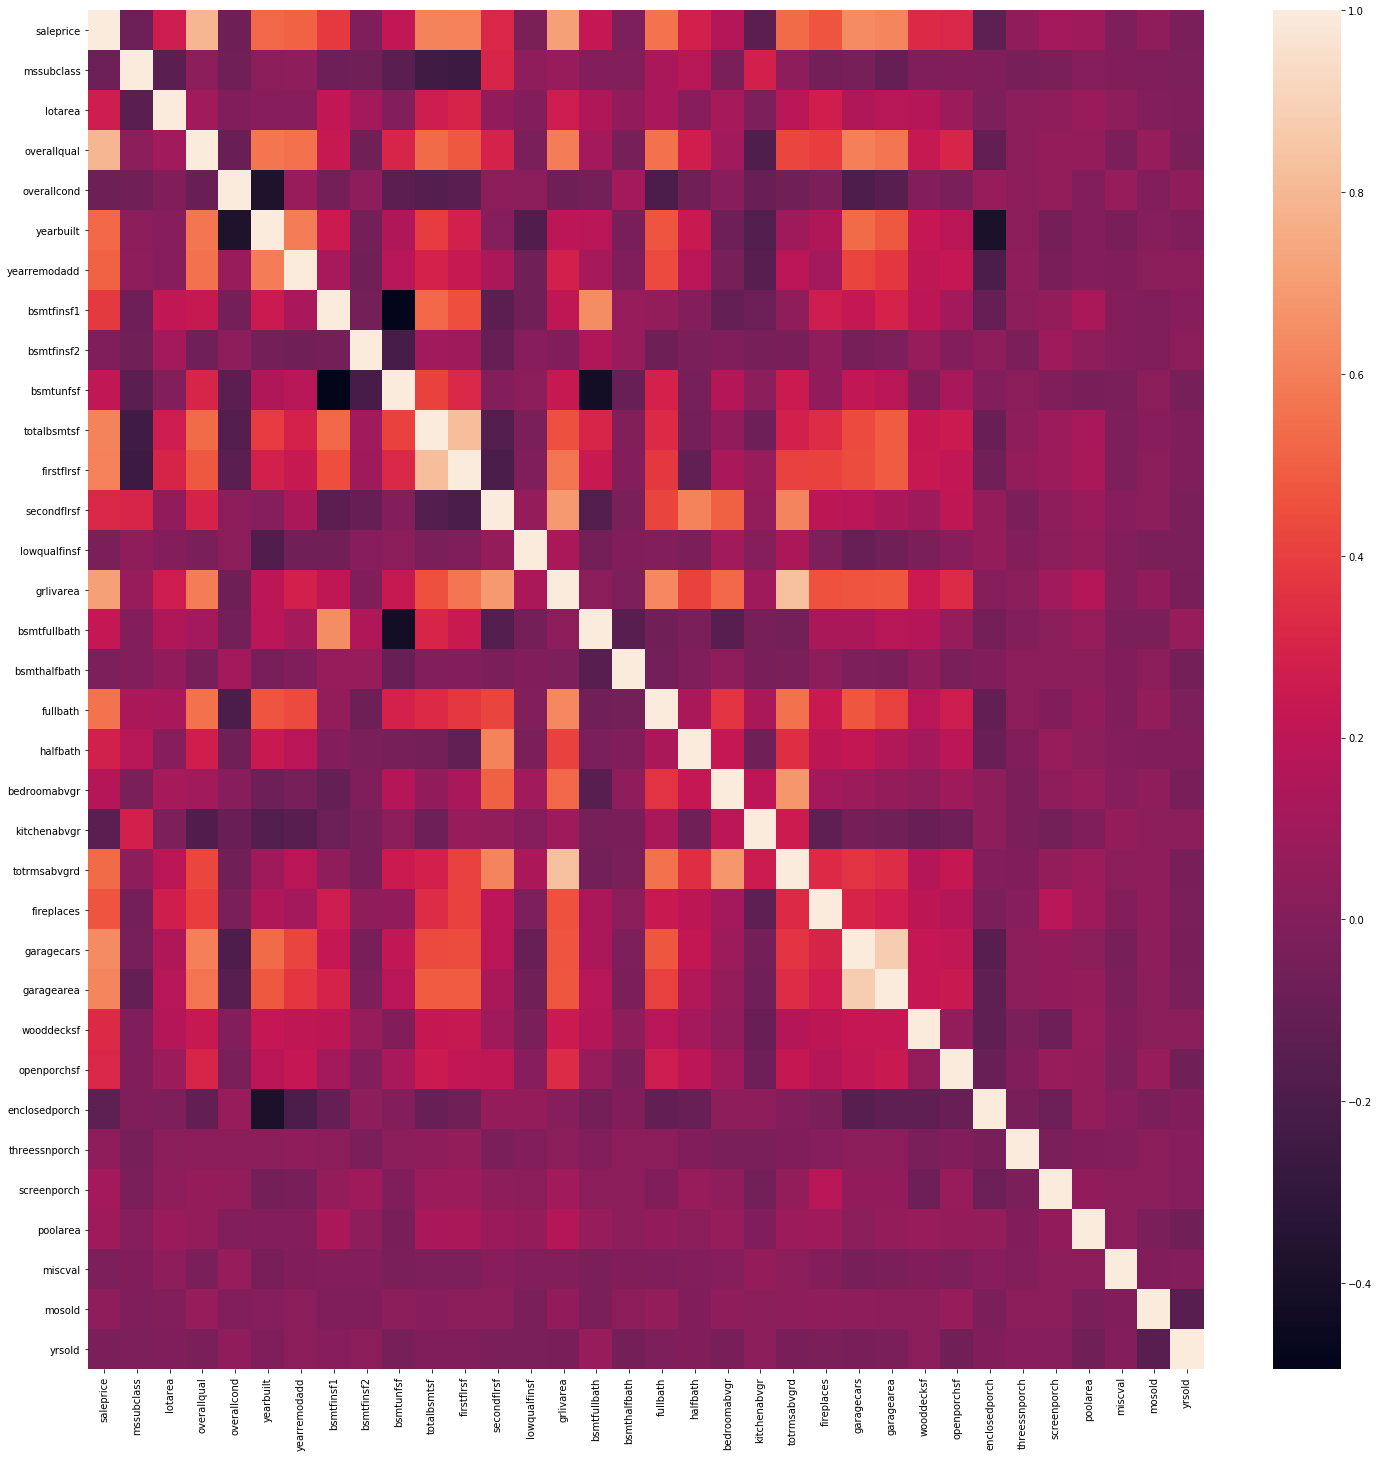

In [18]:
fig = plt.subplots(figsize=(25,25))
num_corr = num_df.corr()
sns.heatmap(num_corr)

In [19]:
# Populate list with all numeric columns and remove any that are too closely correlated

features = list(num_corr.columns)
print('original feature length: {}'.format(len(features)))

# Loops to check correlation under diagonal (where columns correlate with themselves)
for x in range(0, len(num_corr.columns), 1):
    col =  abs(num_corr.iloc[(x+1):, x]).sort_values(ascending=False)
    for y in range(len(col)):
        if col[y] > .700:
            if col.index[y] in features:
                features.remove(col.index[y])
#if 'saleprice' not in features:
#    features.append('saleprice')
print('new feature length: {}'.format(len(features)))

original feature length: 34
new feature length: 29


In [20]:
num_df = num_df[features]


nonum_list = []
for col in cols:
    if col not in num_corr.columns: # num_corr chosen because it contains all numeric value columns
        nonum_list.append(col)
        
nonum_df = houseprices[nonum_list]

In [21]:
new_corr = num_df.corr()

feats_list = []
sale = abs(new_corr.loc[:, 'saleprice']).sort_values(ascending=False)
for x in new_corr.columns:
    if x != 'saleprice':
        if sale[x] > .5000:
            feats_list.append(x)

for x in nonum_df.columns:
    if len(nonum_df[x].unique()) < 5:
        feats_list.append(x)

In [22]:
feats_df = houseprices[feats_list]
for col in feats_df.columns:
    if col in nonum_df.columns:
        dum_df = pd.get_dummies(feats_df[col], prefix= col, drop_first=True)
        feats_df = pd.concat([feats_df, dum_df], axis=1)
        feats_df.drop(col, axis=1, inplace=True)

In [23]:
# Fit with ordinary least squares method
y = houseprices.saleprice
X = feats_df
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     157.2
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:58:09   Log-Likelihood:                -17603.
No. Observations:                1460   AIC:                         3.526e+04
Df Residuals:                    1435   BIC:                         3.539e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.299e+04   1.69e+05     -0.255      0.799   -3.74e+05    2.88e+05
yearbuilt         -118.5391     58.280     -2.034      0.042    -232.862      -4.216
yearremodadd       199.8212     78.737      2.538      0.011      45.370     354.273
totalbsmtsf         42.3330      3.091     13.696      0.000      36.270      48.396
fullbath          2.863e+04   2501.205     11.446      0.000    2.37e+04    3.35e+04
garagecars        2.431e+04   1963.661     12.380      0.000    2.05e+04    2.82e+04
street_Pave       2.598e+04   1.86e+04      1.398      0.162   -1.05e+04    6.24e+04
lotshape_IR2      1.087e+04   6961.795      1.562      0.118   -2781.618    2.45e+04
lotshape_IR3     -2.905e+04   1.37e+04     -2.119      0.034    -5.6e+04   -2154.566
lotshape_Reg     -1.117e+04   2473.442     -4.517      0.000    -1.6e+04   -6319.387
landcontour_HLS   2.079e+04   8200.993      2.535      0.011    4699.323    3.69e+04
landcontour_Low   1.308e+04   9791.857      1.336      0.182   -6124.240    3.23e+04
landcontour_Lvl   8405.1383   5862.460      1.434      0.152   -3094.771    1.99e+04
utilities_NoSeWa -1.846e+04   4.23e+04     -0.436      0.663   -1.01e+05    6.45e+04
landslope_Mod     1.906e+04   6416.891      2.970      0.003    6469.930    3.16e+04
landslope_Sev     2.789e+04   1.35e+04      2.064      0.039    1387.455    5.44e+04
exterqual_Fa     -8.072e+04   1.55e+04     -5.221      0.000   -1.11e+05   -5.04e+04
exterqual_Gd     -4.845e+04   7387.912     -6.557      0.000   -6.29e+04    -3.4e+04
exterqual_TA     -7.155e+04   8093.002     -8.841      0.000   -8.74e+04   -5.57e+04
centralair_Y      1.716e+04   5195.210      3.303      0.001    6970.243    2.74e+04
kitchenqual_Fa   -6.415e+04   9828.232     -6.527      0.000   -8.34e+04   -4.49e+04
kitchenqual_Gd   -5.797e+04   5507.776    -10.524      0.000   -6.88e+04   -4.72e+04
kitchenqual_TA   -7.024e+04   6213.382    -11.305      0.000   -8.24e+04   -5.81e+04
paveddrive_P      7963.5797   9068.714      0.878      0.380   -9825.778    2.58e+04
paveddrive_Y      5840.9337   5306.885      1.101      0.271   -4569.151    1.63e+04
==============================================================================
Omnibus:                      476.496   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11059.088
Skew:                           0.967   Prob(JB):                         0.00
Kurtosis:                      16.344   Cond. No.                     4.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+05. This might indicate that there are
strong multicollinearity or other numerical pr

In [41]:
# make a list of only the columns with the lowest p-values (p-values determine whether data was due to natural random noise)
keep_feats = []
for x in range(len(results.pvalues)):
    if results.pvalues.sort_values(ascending=False)[x] < .05:
        if results.pvalues.sort_values(ascending=False).index[x] != 'const':
            keep_feats.append(results.pvalues.sort_values(ascending=False).index[x])
print(keep_feats)

['yearbuilt', 'landslope_Sev', 'lotshape_IR3', 'landcontour_HLS', 'yearremodadd', 'landslope_Mod', 'centralair_Y', 'lotshape_Reg', 'exterqual_Fa', 'kitchenqual_Fa', 'exterqual_Gd', 'exterqual_TA', 'kitchenqual_Gd', 'kitchenqual_TA', 'fullbath', 'garagecars', 'totalbsmtsf']


In [42]:
X = feats_df[keep_feats]
X = sm.add_constant(X)
new_results = sm.OLS(y, X).fit()
new_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     221.1
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:39:23   Log-Likelihood:                -17608.
No. Observations:                1460   AIC:                         3.525e+04
Df Residuals:                    1442   BIC:                         3.535e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.568e+04   1.65e+05     -0.276      0.782    -3.7e+05    2.79e+05
yearbuilt         -93.9240     54.945     -1.709      0.088    -201.706      13.858
landslope_Sev    3.176e+04    1.2e+04      2.657      0.008    8312.777    5.52e+04
lotshape_IR3    -3.131e+04   1.36e+04     -2.303      0.021    -5.8e+04   -4637.909
landcontour_HLS   1.27e+04   6350.100      2.000      0.046     246.736    2.52e+04
yearremodadd      196.6162     77.762      2.528      0.012      44.078     349.154
landslope_Mod     1.84e+04   5612.720      3.279      0.001    7392.517    2.94e+04
centralair_Y     1.834e+04   5130.575      3.574      0.000    8274.786    2.84e+04
lotshape_Reg    -1.188e+04   2418.076     -4.912      0.000   -1.66e+04   -7134.949
exterqual_Fa    -8.919e+04   1.48e+04     -6.046      0.000   -1.18e+05   -6.03e+04
kitchenqual_Fa  -6.474e+04   9806.705     -6.602      0.000    -8.4e+04   -4.55e+04
exterqual_Gd    -4.904e+04   7373.662     -6.651      0.000   -6.35e+04   -3.46e+04
exterqual_TA    -7.231e+04   8073.817     -8.956      0.000   -8.81e+04   -5.65e+04
kitchenqual_Gd  -5.742e+04   5505.445    -10.429      0.000   -6.82e+04   -4.66e+04
kitchenqual_TA  -6.961e+04   6202.150    -11.224      0.000   -8.18e+04   -5.74e+04
fullbath         2.861e+04   2485.693     11.510      0.000    2.37e+04    3.35e+04
garagecars       2.437e+04   1950.595     12.493      0.000    2.05e+04    2.82e+04
totalbsmtsf        42.2290      3.081     13.706      0.000      36.185      48.273
==============================================================================
Omnibus:                      467.167   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11471.035
Skew:                           0.920   Prob(JB):                         0.00
Kurtosis:                      16.608   Cond. No.                     4.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# Sorted coefficients for each feature from greatest to least
results.params.sort_values(ascending=False)

fullbath            28627.591205
landslope_Sev       27893.202135
street_Pave         25983.601414
garagecars          24309.208916
landcontour_HLS     20786.542268
landslope_Mod       19057.421534
centralair_Y        17161.262583
landcontour_Low     13083.646542
lotshape_IR2        10874.767016
landcontour_Lvl      8405.138251
paveddrive_P         7963.579733
paveddrive_Y         5840.933747
yearremodadd          199.821172
totalbsmtsf            42.333044
yearbuilt            -118.539115
lotshape_Reg       -11171.337676
utilities_NoSeWa   -18460.411146
lotshape_IR3       -29052.372420
const              -42985.807662
exterqual_Gd       -48445.596599
kitchenqual_Gd     -57965.123501
kitchenqual_Fa     -64152.707465
kitchenqual_TA     -70241.162746
exterqual_TA       -71546.634676
exterqual_Fa       -80718.301704
dtype: float64